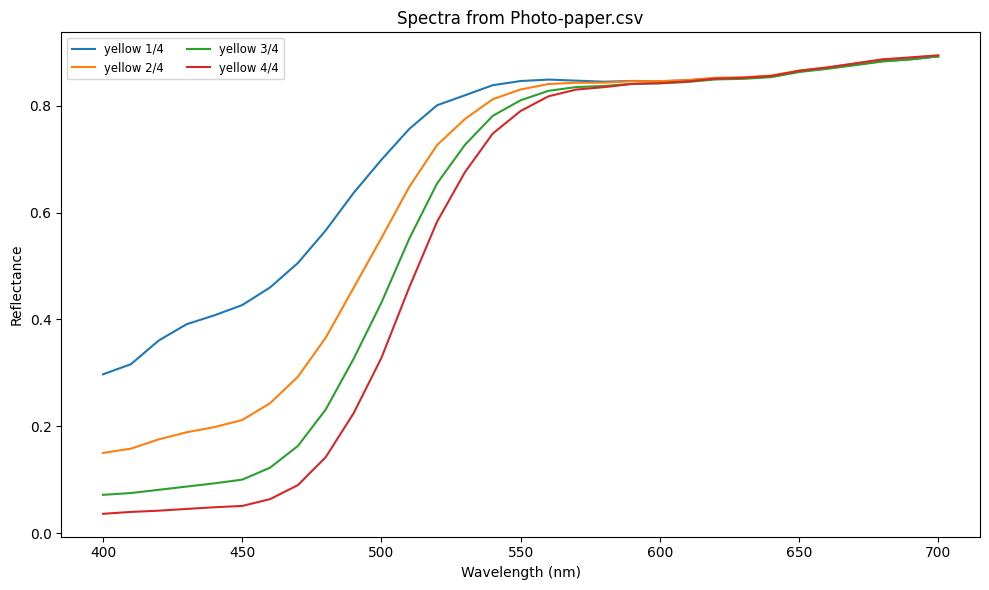

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the inkset CSV
df = pd.read_csv('./spectrums/Photo-paper.csv', sep=';', header=3)

# Find the columns for R400 nm to R700 nm
wavelength_cols = [col for col in df.columns if col.startswith('R') and 'nm' in col]
# Ensure correct order by extracting the numeric part and sorting
wavelength_cols = sorted(wavelength_cols, key=lambda x: int(x.replace('R', '').replace(' nm', '').replace('nm', '').strip()))

# Also get the user color name column
color_name_col = 'User Color Name'

# Plot each spectrum
plt.figure(figsize=(10, 6))
for idx, row in df.iterrows():
    spectrum = row[wavelength_cols].astype(float)
    color_name = row[color_name_col]
    if 'yellow' in color_name:
        plt.plot([int(w[1:].replace(' nm', '').replace('nm', '').strip()) for w in wavelength_cols], spectrum, label=color_name)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Spectra from Photo-paper.csv')
plt.legend(loc='best', fontsize='small', ncol=2)
plt.tight_layout()
plt.show()


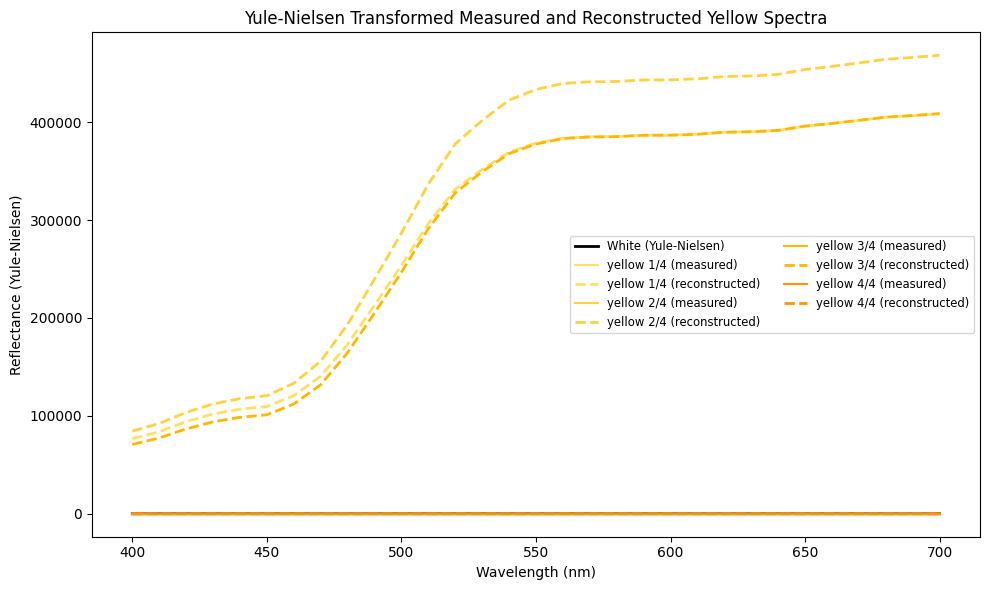

In [17]:
import numpy as np

# Helper: get spectrum row by user color name
def get_spectrum_by_name(df, name):
    return df[df['User Color Name'] == name].iloc[0][wavelength_cols].astype(float).values

# Get the relevant spectrums
white_spec = get_spectrum_by_name(df, 'White')
yellow_specs = {
    f'yellow {i}/4': get_spectrum_by_name(df, f'yellow {i}/4')
    for i in range(1, 5)
}
yellow_4_4_spec = yellow_specs['yellow 4/4']

# Reconstruct each yellow x/4 as x/4 of 4/4 + (1-x/4) of White
n = 20.0
recon_yellow_specs = {}
for i in range(1, 5):
    frac = i / 4
    recon = np.power(np.power(frac * yellow_4_4_spec, 1/n) + np.power((1 - frac) * white_spec, 1/n), n)
    recon_yellow_specs[f'yellow {i}/4'] = recon

# Plot
plt.figure(figsize=(10, 6))
wavelengths = [int(w[1:].replace(' nm', '').replace('nm', '').strip()) for w in wavelength_cols]

plt.plot(wavelengths, yn_white, label='White (Yule-Nielsen)', color='black', linewidth=2)

colors = ['#ffe066', '#ffd23f', '#ffb700', '#ff9500']  # Just for visual distinction
for i, (name, yn_spec) in enumerate(yellow_specs.items(), 1):
    plt.plot(wavelengths, yn_spec, label=f'{name} (measured)', color=colors[i-1])
    plt.plot(wavelengths, recon_yellow_specs[name], '--', label=f'{name} (reconstructed)', color=colors[i-1], linewidth=2)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (Yule-Nielsen)')
plt.title('Yule-Nielsen Transformed Measured and Reconstructed Yellow Spectra')
plt.legend(loc='best', fontsize='small', ncol=2)
plt.tight_layout()
plt.show()

